In [70]:

import os
os.environ["TF_CPP_MIN_LOG_LEVEL"] = "2"
# ML
import tensorflow as tf
from tensorflow import keras
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import classification_report

Loading the data

In [71]:
# Load the MNIST dataset
mnist = keras.datasets.mnist
(x_train, y_train), (x_test, y_test) = mnist.load_data()
# Preprocess the data
x_train = x_train / 255.0
x_test = x_test / 255.0
# Reshape the data for use in a convolutional neural network
x_train = x_train.reshape(x_train.shape[0], 28, 28, 1)
x_test = x_test.reshape(x_test.shape[0], 28, 28, 1)

Creating the model

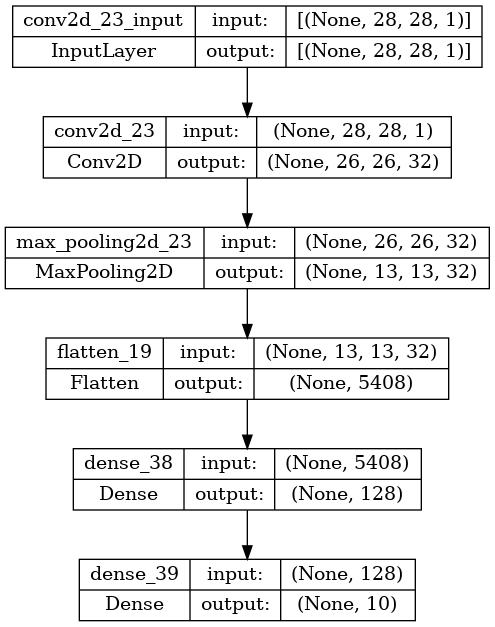

In [72]:
# We build the model using convolutional layers followed by max pooling layers
# Max pooling layers are used to down sample the feature maps summarizing the most actived presence of a feature
model = keras.Sequential([
    keras.layers.Conv2D(32, (3,3), activation='relu', input_shape=(28, 28, 1)),
    keras.layers.MaxPooling2D((2,2)),
    keras.layers.Flatten(),
    keras.layers.Dense(128, activation='relu'),
    keras.layers.Dense(10, activation='softmax')
])
# We use softmax as the activation to represent the confidence (0-1)
tf.keras.utils.plot_model(model, 'model.png', show_shapes=True)

Training the model

In [73]:
# Compile the model
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])
# Define the early stopping callback
early_stop = keras.callbacks.EarlyStopping(monitor='val_loss', patience=20)

# Train the model with early stopping
history = model.fit(x_train, y_train, epochs=1000, validation_split=0.2, callbacks=[early_stop])

Epoch 1/1000
1500/1500 [==============================] - 22s 14ms/step - loss: 0.1782 - accuracy: 0.9461 - val_loss: 0.0708 - val_accuracy: 0.9799
Epoch 2/1000
1500/1500 [==============================] - 21s 14ms/step - loss: 0.0560 - accuracy: 0.9831 - val_loss: 0.0678 - val_accuracy: 0.9788
Epoch 3/1000
1500/1500 [==============================] - 19s 13ms/step - loss: 0.0343 - accuracy: 0.9888 - val_loss: 0.0493 - val_accuracy: 0.9852
Epoch 4/1000
1500/1500 [==============================] - 20s 13ms/step - loss: 0.0229 - accuracy: 0.9932 - val_loss: 0.0528 - val_accuracy: 0.9852
Epoch 5/1000
1500/1500 [==============================] - 20s 13ms/step - loss: 0.0154 - accuracy: 0.9948 - val_loss: 0.0626 - val_accuracy: 0.9834
Epoch 6/1000
1500/1500 [==============================] - 20s 13ms/step - loss: 0.0105 - accuracy: 0.9968 - val_loss: 0.0693 - val_accuracy: 0.9833
Epoch 7/1000
1500/1500 [==============================] - 18s 12ms/step - loss: 0.0082 - accuracy: 0.9972 - val_

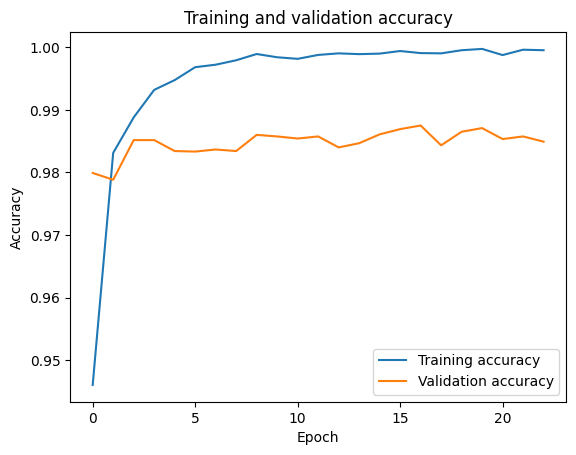

313/313 [==============================] - 1s 3ms/step
              precision    recall  f1-score   support

           0     0.9829    0.9959    0.9894       980
           1     0.9886    0.9956    0.9921      1135
           2     0.9883    0.9797    0.9839      1032
           3     0.9939    0.9743    0.9840      1010
           4     0.9889    0.9969    0.9929       982
           5     0.9455    0.9910    0.9677       892
           6     0.9863    0.9791    0.9827       958
           7     0.9752    0.9932    0.9841      1028
           8     0.9947    0.9723    0.9834       974
           9     0.9928    0.9604    0.9763      1009

    accuracy                         0.9839     10000
   macro avg     0.9837    0.9838    0.9837     10000
weighted avg     0.9842    0.9839    0.9839     10000



In [74]:
# Plot the accuracy during training
plt.plot(history.history['accuracy'], label='Training accuracy')
plt.plot(history.history['val_accuracy'], label='Validation accuracy')
plt.title('Training and validation accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()
# Make predictions on the test data
y_pred = model.predict(x_test)
y_pred_classes = np.argmax(y_pred, axis=1)

# Compute precision and recall for each class
print(classification_report(y_test, y_pred_classes,digits=4))

Enlarging the convolution window

In [75]:
# Build the model with a larger convolution window
model = keras.Sequential([
    keras.layers.Conv2D(32, (5,5), activation='relu', input_shape=(28, 28, 1)),
    keras.layers.MaxPooling2D((2,2)),
    keras.layers.Flatten(),
    keras.layers.Dense(128, activation='relu'),
    keras.layers.Dense(10, activation='softmax')
])

# Compile the model
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

# Define the early stopping callback
early_stop = keras.callbacks.EarlyStopping(monitor='val_loss', patience=20)

# Train the model with early stopping
history = model.fit(x_train, y_train, epochs=1000, validation_split=0.2, callbacks=[early_stop])

Epoch 1/1000
1500/1500 [==============================] - 20s 13ms/step - loss: 0.1607 - accuracy: 0.9509 - val_loss: 0.0698 - val_accuracy: 0.9781
Epoch 2/1000
1500/1500 [==============================] - 21s 14ms/step - loss: 0.0535 - accuracy: 0.9832 - val_loss: 0.0530 - val_accuracy: 0.9843
Epoch 3/1000
1500/1500 [==============================] - 20s 13ms/step - loss: 0.0358 - accuracy: 0.9887 - val_loss: 0.0487 - val_accuracy: 0.9857
Epoch 4/1000
1500/1500 [==============================] - 19s 13ms/step - loss: 0.0251 - accuracy: 0.9914 - val_loss: 0.0462 - val_accuracy: 0.9872
Epoch 5/1000
1500/1500 [==============================] - 23s 16ms/step - loss: 0.0173 - accuracy: 0.9944 - val_loss: 0.0585 - val_accuracy: 0.9832
Epoch 6/1000
1500/1500 [==============================] - 21s 14ms/step - loss: 0.0138 - accuracy: 0.9954 - val_loss: 0.0454 - val_accuracy: 0.9879
Epoch 7/1000
1500/1500 [==============================] - 22s 15ms/step - loss: 0.0087 - accuracy: 0.9972 - val_

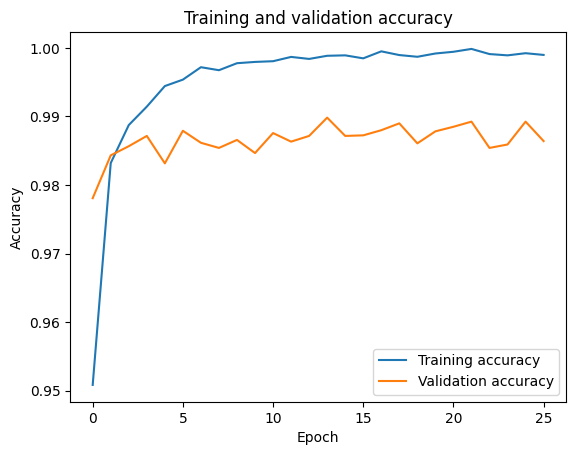

313/313 [==============================] - 1s 3ms/step
              precision    recall  f1-score   support

           0     0.9908    0.9918    0.9913       980
           1     0.9904    0.9974    0.9939      1135
           2     0.9846    0.9922    0.9884      1032
           3     0.9940    0.9802    0.9870      1010
           4     0.9760    0.9939    0.9849       982
           5     0.9899    0.9888    0.9893       892
           6     0.9958    0.9823    0.9890       958
           7     0.9789    0.9942    0.9865      1028
           8     0.9886    0.9815    0.9851       974
           9     0.9899    0.9742    0.9820      1009

    accuracy                         0.9878     10000
   macro avg     0.9879    0.9876    0.9877     10000
weighted avg     0.9879    0.9878    0.9878     10000



In [76]:
# Plot the accuracy during training
plt.plot(history.history['accuracy'], label='Training accuracy')
plt.plot(history.history['val_accuracy'], label='Validation accuracy')
plt.title('Training and validation accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()
# Make predictions on the test data
y_pred = model.predict(x_test)
y_pred_classes = np.argmax(y_pred, axis=1)

# Compute precision and recall for each class
print(classification_report(y_test, y_pred_classes,digits=4))

Enlarging the stride

In [77]:
model = keras.Sequential([
    keras.layers.Conv2D(32, (3,3), strides=(2,2), activation='relu', input_shape=(28, 28, 1)),
    keras.layers.MaxPooling2D((2,2)),
    keras.layers.Flatten(),
    keras.layers.Dense(128, activation='relu'),
    keras.layers.Dense(10, activation='softmax')
])

# Compile the model
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

# Define the early stopping callback
early_stop = keras.callbacks.EarlyStopping(monitor='val_loss', patience=20)

# Train the model with early stopping
history = model.fit(x_train, y_train, epochs=1000, validation_split=0.2, callbacks=[early_stop])

Epoch 1/1000
1500/1500 [==============================] - 7s 4ms/step - loss: 0.2506 - accuracy: 0.9266 - val_loss: 0.1151 - val_accuracy: 0.9657
Epoch 2/1000
1500/1500 [==============================] - 7s 4ms/step - loss: 0.0934 - accuracy: 0.9715 - val_loss: 0.0840 - val_accuracy: 0.9748
Epoch 3/1000
1500/1500 [==============================] - 7s 4ms/step - loss: 0.0654 - accuracy: 0.9799 - val_loss: 0.0699 - val_accuracy: 0.9794
Epoch 4/1000
1500/1500 [==============================] - 7s 4ms/step - loss: 0.0482 - accuracy: 0.9855 - val_loss: 0.0596 - val_accuracy: 0.9821
Epoch 5/1000
1500/1500 [==============================] - 7s 5ms/step - loss: 0.0381 - accuracy: 0.9883 - val_loss: 0.0569 - val_accuracy: 0.9812
Epoch 6/1000
1500/1500 [==============================] - 7s 4ms/step - loss: 0.0287 - accuracy: 0.9909 - val_loss: 0.0567 - val_accuracy: 0.9827
Epoch 7/1000
1500/1500 [==============================] - 6s 4ms/step - loss: 0.0234 - accuracy: 0.9924 - val_loss: 0.0618 -

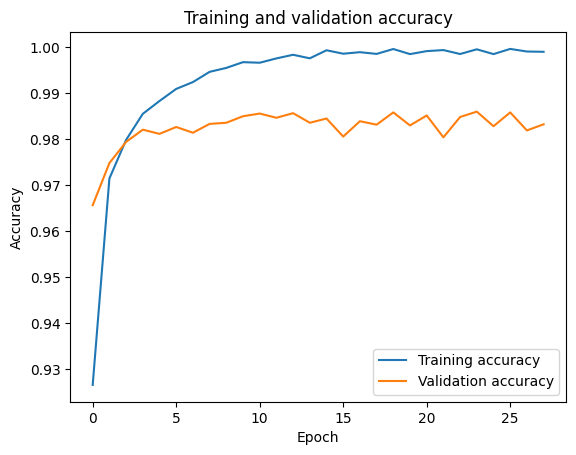

313/313 [==============================] - 1s 2ms/step
              precision    recall  f1-score   support

           0     0.9760    0.9939    0.9848       980
           1     0.9860    0.9947    0.9904      1135
           2     0.9941    0.9738    0.9838      1032
           3     0.9833    0.9921    0.9877      1010
           4     0.9848    0.9868    0.9858       982
           5     0.9899    0.9843    0.9871       892
           6     0.9895    0.9823    0.9859       958
           7     0.9705    0.9912    0.9808      1028
           8     0.9896    0.9784    0.9840       974
           9     0.9879    0.9713    0.9795      1009

    accuracy                         0.9850     10000
   macro avg     0.9851    0.9849    0.9850     10000
weighted avg     0.9851    0.9850    0.9850     10000



In [78]:
# Plot the accuracy during training
plt.plot(history.history['accuracy'], label='Training accuracy')
plt.plot(history.history['val_accuracy'], label='Validation accuracy')
plt.title('Training and validation accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()
# Make predictions on the test data
y_pred = model.predict(x_test)
y_pred_classes = np.argmax(y_pred, axis=1)

# Compute precision and recall for each class
print(classification_report(y_test, y_pred_classes,digits=4))

Higher dropout rate

In [79]:
# Build the model with a higher dropout rate
model = keras.Sequential([
    keras.layers.Conv2D(32, (3,3), activation='relu', input_shape=(28, 28, 1)),
    keras.layers.MaxPooling2D((2,2)),
    keras.layers.Flatten(),
    keras.layers.Dense(128, activation='relu'),
    keras.layers.Dropout(0.5),
    keras.layers.Dense(10, activation='softmax')
])

# Compile the model
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

# Define the early stopping callback
early_stop = keras.callbacks.EarlyStopping(monitor='val_loss', patience=20)

# Train the model with early stopping
history = model.fit(x_train, y_train, epochs=1000, validation_split=0.2, callbacks=[early_stop])

Epoch 1/1000
1500/1500 [==============================] - 22s 15ms/step - loss: 0.2631 - accuracy: 0.9212 - val_loss: 0.0790 - val_accuracy: 0.9771
Epoch 2/1000
1500/1500 [==============================] - 22s 15ms/step - loss: 0.1083 - accuracy: 0.9677 - val_loss: 0.0616 - val_accuracy: 0.9825
Epoch 3/1000
1500/1500 [==============================] - 22s 14ms/step - loss: 0.0804 - accuracy: 0.9763 - val_loss: 0.0580 - val_accuracy: 0.9839
Epoch 4/1000
1500/1500 [==============================] - 21s 14ms/step - loss: 0.0672 - accuracy: 0.9799 - val_loss: 0.0492 - val_accuracy: 0.9855
Epoch 5/1000
1500/1500 [==============================] - 21s 14ms/step - loss: 0.0574 - accuracy: 0.9821 - val_loss: 0.0483 - val_accuracy: 0.9853
Epoch 6/1000
1500/1500 [==============================] - 22s 14ms/step - loss: 0.0493 - accuracy: 0.9844 - val_loss: 0.0477 - val_accuracy: 0.9858
Epoch 7/1000
1500/1500 [==============================] - 22s 14ms/step - loss: 0.0414 - accuracy: 0.9866 - val_

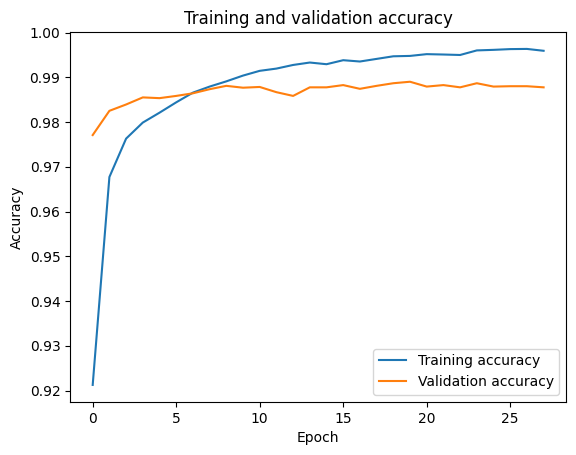

313/313 [==============================] - 1s 3ms/step
              precision    recall  f1-score   support

           0     0.9878    0.9949    0.9914       980
           1     0.9904    0.9974    0.9939      1135
           2     0.9884    0.9874    0.9879      1032
           3     0.9871    0.9881    0.9876      1010
           4     0.9928    0.9898    0.9913       982
           5     0.9811    0.9888    0.9849       892
           6     0.9854    0.9854    0.9854       958
           7     0.9874    0.9893    0.9883      1028
           8     0.9897    0.9846    0.9871       974
           9     0.9919    0.9762    0.9840      1009

    accuracy                         0.9883     10000
   macro avg     0.9882    0.9882    0.9882     10000
weighted avg     0.9883    0.9883    0.9883     10000



In [80]:
# Plot the accuracy during training
plt.plot(history.history['accuracy'], label='Training accuracy')
plt.plot(history.history['val_accuracy'], label='Validation accuracy')
plt.title('Training and validation accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()
# Make predictions on the test data
y_pred = model.predict(x_test)
y_pred_classes = np.argmax(y_pred, axis=1)

# Compute precision and recall for each class
print(classification_report(y_test, y_pred_classes,digits=4))